# Jasmine Widgery, Braedan Nevers
# Project 5 - Neural Network
# Fall 2023

In [27]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import datetime
import time
import math

import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [28]:
#consts and globals
num_labels = 10
MAX_ITER = 2000 #failsafe for if stopping condition doesn't trigger

global etaMultiplier
etaMultiplier = 0.6 #fixed value used to update learning rate every x number of steps

There are 60000 training images
There are 10000 testing images
There are 30000 training images
There are 30000 training y vals


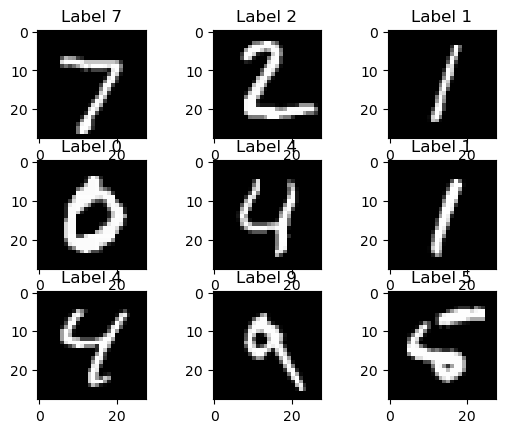

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Ensure data loaded in correctly
print("There are " + str(len(X_train)) + " training images" )
print("There are " + str(len(X_test)) + " testing images" )

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    label = "Label " + str(y_train[i])
    plt.title(label)
    
    
#split data in half for testing
half_X_Train = []
half_Y_Train = []
for i in range (math.trunc(len(X_train) / 2)):
    half_X_Train.append(X_train[i])
    half_Y_Train.append(y_train[i])

    
#Ensure data loaded in correctly
print("There are " + str(len(half_X_Train)) + " training images" )
print("There are " + str(len(half_Y_Train)) + " training y vals" )

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(half_X_Train[i], cmap='gray', interpolation='none')
    label = "HALF Label " + str(half_Y_Train[i])
    plt.title(label)
    

''' VERY IMPORTANT - COMMENT OUT THE BELOW LINES TO TEST ON FULL TRAINING SET'''
#X_train = half_X_Train
#Y_train = half_Y_Train


#print testing data
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap='gray', interpolation='none')
    label = "Label " + str(y_test[i])
    plt.title(label)
#
    

In [30]:
#Step 0 - map y values into vectors
y_train_vectors = []
for val in y_train:
    arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #init array of all 0s
    if val == 0:
        arr[9] = 1 #if y = 0, place 1 at 10th index
    else:
        arr[val - 1] = 1
    y_train_vectors.append(arr)
    
y_train_vectors = np.array(y_train_vectors)

#check labels are correct
for i in range(9):
    print(y_train_vectors[i])
    
#Also do it for testing set
y_test_vectors = []
for val in y_test:
    arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #init array of all 0s
    if val == 0:
        arr[9] = 1 #if y = 0, place 1 at 10th index
    else:
        arr[val - 1] = 1
    y_test_vectors.append(arr)
    
y_test_vectors = np.array(y_test_vectors)

print(" ")
#check labels are correct
for i in range(9):
    print(y_test_vectors[i])

[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
 
[0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0 0]


In [31]:
#Step 1 - setup network architecture

class NN3L: #Neural Network 3 Layers (input, hidden, output)
    def __init__(self, s2, eta): #constructor
        self.hiddenLSize_ = s2
        self.learningRate_ = eta
        self.inputLSize_ = 28*28 #image size (784)
        self.outputLSize_ = 10 #size of Y
        
        #
        #matrix of weights between input and hidden layer (size should be s2 x 785 )
        self.Weights1_ = np.array([[np.random.normal(0, self.hiddenLSize_**(-.5)) for i in range(self.inputLSize_+1)] for j in range(self.hiddenLSize_)])
        # Adding the constant 1 cols
        for weight in range(self.Weights1_.shape[0]):
            self.Weights1_[weight][0] = 1 
            
        #matrix of weights between hidden and output layer (size should be 10 x s2 + 1)
        self.Weights2_ = np.array([[np.random.normal(0, self.outputLSize_**(-.5)) for i in range(self.hiddenLSize_+1)] for j in range(self.outputLSize_)])
        # Adding the constant 1 cols
        for weight in range(self.Weights2_.shape[0]):
            self.Weights2_[weight][0] = 1       
        
        
    #helper print func
    def PrintData(self):
        print("Hidden Layer Size:")
        print(self.hiddenLSize_)
        
        print("Learning Rate:")
        print(self.learningRate_)
        
        print("Input Layer Size:")
        print(self.inputLSize_)
        
        print("Output Layer Size:")
        print(self.outputLSize_)
        
        print("Shape W1:")
        print(self.Weights1_.shape)
        
        print("Weights 1:")
        print(self.Weights1_)
        
        print("Shape W2:")
        print(self.Weights2_.shape)
        
        print("Weights 2:")
        print(self.Weights2_)
        
        
    #Set up member functions    
    def sigmoid(self, x): #sigmoid on single value
        return 1 / (1 + np.exp(-x))
    
    def sigmoidVec(self, xVec): #sigmoid on vector
        returnVec = []
        for index in range(len(xVec)):
            returnVec.append(self.sigmoid(xVec[index]))
        returnArr = np.array(returnVec)
        return returnArr
           
    def sigmoidPrime(self, x): #sigmoid prime on single value
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def sigmoidPrimeVec(self, xVec): #sigmoid prime on vector
        returnVec = []
        for index in range(len(xVec)):
            returnVec.append(self.sigmoidPrime(xVec[index]))
        returnArr = np.array(returnVec)
        return returnArr                
                
    def CloseToZero(self, g1, g2):    
        numClose1 = 0
        numClose2 = 0
        for i, j in zip(range(0, len(g1)), range(0, len(g1[0]))):
            if math.isclose(g1[i][j], 0, abs_tol = 0.005):#change both absolute tolerance values to update the stopping condition
               numClose1 += 1 
            
        for i, j in zip(range(0, len(g2)), range(0, len(g2[0]))):
            if math.isclose(g2[i][j], 0, abs_tol = 0.005):#change both absolute tolerance values to update the stopping condition
               numClose2 += 1 
                       
        if numClose1 == len(g1) and numClose2 == len(g2):
            return True
        else:
            return False
    
    # Part 2 Step 3, 
    #Feed Forward algorithm 
    def FeedForward(self, xVals):
        a1 = np.insert(xVals, 0, 1) # add the bias term
        z2 = np.dot(self.Weights1_,  a1) # Let z(2) = W (1)a(1) (it has dimension s2 × 1)
        a2 = self.sigmoidVec(z2) # Let a(2) = θ(z(2)) 
        a2 = np.insert(a2, 0, 1) # and add a(2)0 = 1, the bias term
        z3 = np.dot(self.Weights2_, a2) # Let z(3) = W (2)a(2) (it has dimension 10 × 1)
        a3 = self.sigmoidVec(z3) # Let a(3) = θ(z(3))
        
        ''' debug prints
        print(a1)
        print(z2)
        print(a2)
        print(z3)
        print(a3)
        print(a1.shape)
        print(z2.shape)
        print(a2.shape)
        print(z3.shape)
        print(a3.shape)
        '''
        
        return a1, z2, a2, z3, a3
    # Back Propagation algorithm 
    def BackPropagation(self, y, a1, z2, a2, z3, a3):
        #google tells me this symbol δ is called delta
        delta3 = a3 - y   #Let δ(3) = a(3) − y (it has dimension 10 × 1)
        W2 = self.Weights2_[:, 1:].copy() #Let ˜W (2) be the matrix W (2) with the column corresponding to the bias term removed, so it has size 10 × s2.
         
            #Let δ(2) = [ ˜W (2)]T δ(3) θ′(z(2)) (it has dimension s2 × 1).
        z2Prime = self.sigmoidPrimeVec(z2)
        delta2 = np.transpose(W2)
        delta2 = np.dot(delta2, delta3)
        delta2 = delta2 * z2Prime # numpy arrays do element by element for * operator 
        
        #Compute the set of partial derivatives with respect to the weights, for k = 1, 2:
        gW1 = delta2.reshape(delta2.shape[0], 1) * a1.reshape(1, a1.shape[0]) # gW (1)(x, y) = δ(2)[a(1)]T → size s2 × 785
        gW2 = delta3.reshape(delta3.shape[0], 1) * a2.reshape(1, a2.shape[0]) # gW (2)(x, y) = δ(3)[a(2)]T → size 10 × (s2 + 1).
        
        return gW1, gW2
        
        ''' debug prints
        print(delta3)
        print(delta3.shape)
        print(W2.shape)
        print(delta2.shape)
        print(gW1.shape)
        print(gW2.shape)
        '''               
            

In [32]:
Network2 = NN3L(20, 0.6) #NOTE-- parameters are (hidden layer size, learning rate). Change these to test new configurations.

#helper function to determine how long program has been running
def calcProcessTime(starttime, cur_iter, max_iter):

    telapsed = time.time() - starttime
    testimated = (telapsed/cur_iter)*(max_iter)

    currTime = datetime.datetime.fromtimestamp(time.time()).strftime("%H:%M:%S")  # time now

    return (int(telapsed), currTime)

In [33]:
## Training
'''
Gradient descent uses two functions; a kickstarter, GradientDescentStart, which runs the algorithm 1 time and then calls the second function,
GradientDescent. This is basically emulating the behavior of a do while loop in C++, which does not have native support in Python.

The iterative function will loop until either the number of iterations has maxed out or the gradient is close to zero; whichever comes first.
Every 300 steps, we multiply the learning rate by a small constant.
'''
global numIter
numIter = 0
def GradientDescent(Network, dataX, dataY, gradient1, gradient2):
    global numIter #used for determining max stopping condition
    global etaMultiplier 
    
    cur_iter = 0 #used for outputting time taken
    start = time.time()
    #until we max out or our gradient is close to zero
    while (numIter <= MAX_ITER):
        numIter += 1
        print(numIter)
        if numIter % 300 == 0: #update learning rate
           Network.learningRate_  = Network.learningRate_  * etaMultiplier
        gW1Array = []
        gW2Array = []
        for index in range(len(dataX)):
            a1, z2, a2, z3, a3 = Network.FeedForward(dataX[index].flatten())
            gw1, gw2 = Network.BackPropagation(dataY[index], a1, z2, a2, z3, a3)
            gW1Array.append(gw1)
            gW2Array.append(gw2)
            cur_iter += 1
            if(index % 10000 == 0):    
                prstime = calcProcessTime(start, cur_iter, MAX_ITER)
                print("time elapsed: %s(s), current time: %s"%prstime)
        # End of data point loop 
        
        # Compute the gradients for the training set D1: for k = 1, 2
        gW1Array = np.array(gW1Array)
        gW2Array = np.array(gW2Array)
        
        gradW1 = np.sum(gW1Array, axis=0) #gradW(k) = (1/|D1|) ∑ gW (k)(x, y)
        gradW1 = gradW1 / len(dataX)
        gradW2 = np.sum(gW2Array, axis=0) #gradW(k) = (1/|D1|) ∑ gW (k)(x, y)
        gradW2 = gradW2 / len(dataX)
        
        #Update weights
        #W(k)t+1 = W(k)t − η · gradW(k)t
        Network.Weights1_ = Network.Weights1_ - (Network.learningRate_ * gradW1)
        Network.Weights2_ = Network.Weights2_ - (Network.learningRate_ * gradW2)
        if(Network.CloseToZero(gradW1, gradW2)):
            print("Convergence Found. Weights saved.")
            return
    return

def GradientDescentStart(Network, dataX, dataY):
    gW1Array = []
    gW2Array = []
    for index in range(len(dataX)):
        a1, z2, a2, z3, a3 = Network.FeedForward(dataX[index].flatten())
        gw1, gw2 = Network.BackPropagation(dataY[index], a1, z2, a2, z3, a3)
        gW1Array.append(gw1)
        gW2Array.append(gw2)
    # End of data point loop 
    
    # Compute the gradients for the training set D1: for k = 1, 2
    gW1Array = np.array(gW1Array)
    gW2Array = np.array(gW2Array)
    
    gradW1 = np.sum(gW1Array, axis=0) #gradW(k) = (1/|D1|) ∑ gW (k)(x, y)
    gradW1 = gradW1 / len(dataX)
    gradW2 = np.sum(gW2Array, axis=0) #gradW(k) = (1/|D1|) ∑ gW (k)(x, y)
    gradW2 = gradW2 / len(dataX)
    
    #Update weights
    #W(k)t+1 = W(k)t − η · gradW(k)t
    Network.Weights1_ = Network.Weights1_ - (Network.learningRate_ * gradW1)
    Network.Weights2_ = Network.Weights2_ - (Network.learningRate_ * gradW2)
    GradientDescent(Network, dataX, dataY, gradW1, gradW2)
        
    # End of descent loop
    print(Network.Weights1_)
    print(Network.Weights2_)

In [34]:
#train
GradientDescentStart(Network2, X_train, y_train_vectors)

1
time elapsed: 0(s), current time: 10:11:20
time elapsed: 4(s), current time: 10:11:25
time elapsed: 15(s), current time: 10:11:35
time elapsed: 29(s), current time: 10:11:49


KeyboardInterrupt: 

In [ ]:
#testing function which computes accuracy of given network
def Test(n, testingDataX, testingDataY):
        numAccurate = 0
        numTotal = len(testingDataY)
        for i in range(len(testingDataX)):
            a1, z2, a2, z3, a3 = n.FeedForward(testingDataX[i].flatten())
            predictionIndex = np.argmax(a3) #get index of highest value in output layer
            correctIndex = np.argmax(testingDataY[i])
            if predictionIndex == correctIndex:
                numAccurate += 1
       
            print("Guessed index " + str(predictionIndex) + " , true value: " + str(correctIndex+1) + " " + str(testingDataY[i]) +" " + str(predictionIndex == correctIndex))
        accuracy = numAccurate / numTotal
        print("Out of  " + str(numTotal))
        print(str(numAccurate) + " are correct.")
        
        print("Network has accuracy of " + str(accuracy))

In [ ]:
Test(Network2, X_test, y_test_vectors)